In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

### MODEL INFERENCE 

Dilakukan model inference dengan memanggil model XGBoost yang sudah di hyperparameter tuning untuk memprediksi bagaimana jika di train dengan data set baru 

In [3]:
dfawal= pd.read_csv(r'C:\Users\User\github-classroom\FTDS-assignment-bay\p1-ftds029-rmt-m2-gedealdi28\bank.csv',sep=';') ## Membaca file csv yang telah disimpan
dfawal

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Langkah awal adalah dengan kita membuat data set baru dengan np.random untuk menguji model kita

In [13]:
np.random.seed(42)

age = np.random.randint(20, 65, size=100)
job_options = ['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'entrepreneur', 'technician']
job = np.random.choice(job_options, size=100)
marital_options = ['married', 'single', 'divorced']
marital = np.random.choice(marital_options, size=100)
education_options = ['primary', 'secondary', 'tertiary']
education = np.random.choice(education_options, size=100)
default = np.random.choice(['yes', 'no'], size=100)
balance = np.random.randint(-5000, 10000, size=100)
housing = np.random.choice(['yes', 'no'], size=100)
loan = np.random.choice(['yes', 'no'], size=100)
contact_options = ['cellular', 'telephone', 'unknown']
contact = np.random.choice(contact_options, size=100)
day = np.random.randint(1, 31, size=100)
month_options = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month = np.random.choice(month_options, size=100)
duration = np.random.randint(50, 500, size=100)
campaign = np.random.randint(1, 10, size=100)
pdays = np.random.randint(-1, 400, size=100)
previous = np.random.randint(0, 10, size=100)
poutcome_options = ['success', 'failure', 'other', 'unknown']
poutcome = np.random.choice(poutcome_options, size=100)
y = np.random.choice(['yes', 'no'], size=100)

# Membuat DataFrame
df = pd.DataFrame({
    'age': age,
    'job': job,
    'marital': marital,
    'education': education,
    'default': default,
    'balance': balance,
    'housing': housing,
    'loan': loan,
    'contact': contact,
    'day': day,
    'month': month,
    'duration': duration,
    'campaign': campaign,
    'pdays': pdays,
    'previous': previous,
    'poutcome': poutcome,
    'y': y
})

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,divorced,tertiary,no,2404,no,yes,cellular,4,mar,426,2,27,9,unknown,no
1,48,management,married,secondary,yes,8184,yes,yes,telephone,30,nov,338,5,294,2,other,yes
2,34,unemployed,single,primary,no,-1657,yes,no,unknown,1,feb,486,8,295,1,success,yes
3,62,management,married,tertiary,no,8500,yes,yes,cellular,17,oct,199,9,212,0,failure,no
4,27,self-employed,married,primary,yes,-930,no,no,cellular,8,mar,326,2,265,6,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63,self-employed,married,tertiary,no,7377,no,no,telephone,8,nov,144,8,53,0,unknown,yes
96,27,unemployed,divorced,secondary,no,3967,yes,yes,cellular,4,aug,354,1,357,4,other,no
97,43,management,married,tertiary,no,1748,yes,no,unknown,24,nov,118,9,129,8,failure,yes
98,30,technician,single,secondary,yes,4817,yes,yes,cellular,25,jun,367,6,286,5,failure,yes


Setelah ini dilakukan pembagian variabel dependen dan variabel independen

In [14]:
X = df.drop('y',axis=1)
y= df[['y']]

In [15]:
X.drop(['default','balance'], axis=1, inplace=True)

Di drop kolom yang tidak punya korelasi tinggi seperti sebelumnya

In [16]:
num1 = X.select_dtypes(exclude=['object']).columns.tolist()
kat1 = X.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik:',num1)
print('Data Kategorik:',kat1)

Data Numerik: ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']
Data Kategorik: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (70, 14)
Test size  :  (30, 14)


Lalu dilakukan split data dengan 30 % dari data menjadi data set uji

In [18]:
xgb_model = joblib.load("xgb_best.pkl")

Lalu dilakukan pemanggilan model menggunakan modul joblib

In [19]:
y_pr_tr=xgb_model.predict(X_train)
y_pr_ts=xgb_model.predict(X_test)

Dan di predict X testnya

c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\ITB\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - Test Set   :  0.38095238095238093 

Classification Report : 
               precision    recall  f1-score   support

          no       0.52      0.93      0.67        14
         yes       0.80      0.25      0.38        16

    accuracy                           0.57        30
   macro avg       0.66      0.59      0.52        30
weighted avg       0.67      0.57      0.51        30
 



XGBoost Confusion Matrix      : 


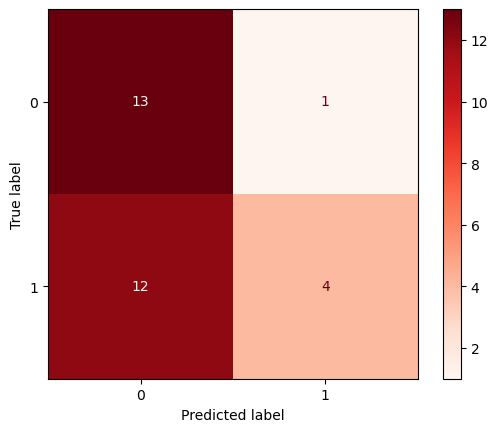

In [28]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)
target = ['no', 'yes']
print('F1 Score - Test Set   : ', f1_score(y_test1, y_pr_ts), '\n')
print('Classification Report : \n', classification_report( y_test1, y_pr_ts, target_names = target ), '\n')
print('XGBoost Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test1, cmap='Reds'))

Inference dari model berhasil dengan memanggil modelnya dan hasil dari performa model tidaklah terlalu baik dengan terlihat f-1 scorenya 0,67. Hal ini dikarenakan kita tidak menggunakan feature engineering sama sekali dalam data yang akan digunakan model training dan model testing dan kita juga menggunakan data set dengan nilai yang digenerate random sehingga banyak outliernya. Maka kesimpulannya semua model termasuk XGBoost adalah model yang juga sensitif terhadap outlier